In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [2]:
import os

In [3]:
import pylab_util as PU

In [4]:
import serial

In [5]:
import serial_utils

In [6]:
import importlib

In [7]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/pi/git/research/serial_utils.py'>

In [8]:
import re

In [9]:
p = re.compile("^[0-9.]+,.*")

In [10]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [11]:
pwd

'/home/pi/sabbatical_github/cart_pendulum/arduino_only'

In [12]:
ls /dev/ttyACM*

/dev/ttyACM0


## Get the portname

In [13]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM0


In [14]:
ser = serial_utils.serial_test(portname)

In [15]:
ser.open()

In [16]:
ser.print_all()

Cart Pendulum Line Follow 3
using rtblockdiagram library
enter any character to calibrate



In [17]:
ser.flush()

### Calibrate

In [18]:
ser.write_char("c")

In [19]:
ser.print_all()

calibrating 200 times
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
calibration results:
172 124 124 124 124 124 168 
1832 1100 832 832 1104 1016 1512 

enter PD_block.Kp



## PD Params

In [19]:
ser.write_float(0.1)

In [20]:
ser.print_all()

calibrating 200 times
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
calibration results:
716 88 84 84 84 84 2500 
2500 1124 868 1040 724 868 2500 

enter PD_block.Kp
PD_block.Kp = 0.10
enter PD_block.Kd



In [22]:
ser.write_float(0.001)

In [23]:
ser.print_all()

PD_block.Kd = 0.00
enter v_nom_block.value



In [24]:
ser.write_int(300)

In [25]:
ser.print_all()

v_nom_block.value = 300
enter t_stop



In [29]:
ser.write_float(0.1)

In [30]:
ser.print_all()

PD_block.Kp = 0.10
enter PD_block.Kd



In [31]:
ser.write_float(0.001)

In [32]:
ser.print_all()

PD_block.Kd = 0.00
enter v_nom_block.value



In [33]:
ser.write_int(325)

In [34]:
ser.print_all()

v_nom_block.value = 325
enter t_stop



In [26]:
ser.write_float(10)

In [27]:
ser.print_all()

t_stop = 10.00
enter any character to start a test



In [28]:
ser.write_char("s")

In [29]:
data = ser.get_data()

In [30]:
data2 = ser.get_data()

In [31]:
data += data2

In [32]:
print(data)

t0 =82648488
0.45,3500,353,150,450,150,400,150,10,3112
12.52,388,-219,-150,150,450,150,400,10,3116
24.58,384,38,38,338,262,338,262,11,3151
36.59,349,31,31,331,269,331,269,12,3032
48.58,468,56,56,356,244,356,244,15,3098
60.57,402,34,34,334,266,334,266,19,2967
72.58,533,64,64,364,236,364,236,23,3001
84.56,499,47,47,347,253,347,253,29,3032
96.56,468,44,44,344,256,344,256,35,3032
108.55,468,46,46,346,254,346,254,42,3147
120.50,353,25,25,325,275,325,275,49,3146
132.50,354,35,35,335,265,335,265,55,3111
144.48,389,41,41,341,259,341,259,61,3246
156.52,254,14,14,314,286,314,286,68,3323
168.56,177,11,11,311,289,311,289,75,3385
180.58,115,6,6,306,294,306,294,81,3438
192.52,62,1,1,301,299,301,299,88,3483
204.37,17,-2,-2,298,302,298,302,93,3534
216.21,-34,-7,-7,293,307,293,307,98,3565
228.11,-65,-9,-9,291,309,291,309,103,3604
240.02,-104,-13,-13,287,313,287,313,107,3619
252.08,-119,-13,-13,287,313,287,313,111,3629
264.20,-129,-13,-13,287,313,287,313,114,3657
276.28,-157,-18,-18,282,318,282,318,116,

In [33]:
float_array = data_to_float_array(data)

In [34]:
float_array[0:20,:]

array([[ 4.5000e-01,  3.5000e+03,  3.5300e+02,  1.5000e+02,  4.5000e+02,
         1.5000e+02,  4.0000e+02,  1.5000e+02,  1.0000e+01,  3.1120e+03],
       [ 1.2520e+01,  3.8800e+02, -2.1900e+02, -1.5000e+02,  1.5000e+02,
         4.5000e+02,  1.5000e+02,  4.0000e+02,  1.0000e+01,  3.1160e+03],
       [ 2.4580e+01,  3.8400e+02,  3.8000e+01,  3.8000e+01,  3.3800e+02,
         2.6200e+02,  3.3800e+02,  2.6200e+02,  1.1000e+01,  3.1510e+03],
       [ 3.6590e+01,  3.4900e+02,  3.1000e+01,  3.1000e+01,  3.3100e+02,
         2.6900e+02,  3.3100e+02,  2.6900e+02,  1.2000e+01,  3.0320e+03],
       [ 4.8580e+01,  4.6800e+02,  5.6000e+01,  5.6000e+01,  3.5600e+02,
         2.4400e+02,  3.5600e+02,  2.4400e+02,  1.5000e+01,  3.0980e+03],
       [ 6.0570e+01,  4.0200e+02,  3.4000e+01,  3.4000e+01,  3.3400e+02,
         2.6600e+02,  3.3400e+02,  2.6600e+02,  1.9000e+01,  2.9670e+03],
       [ 7.2580e+01,  5.3300e+02,  6.4000e+01,  6.4000e+01,  3.6400e+02,
         2.3600e+02,  3.6400e+02,  2.3600e+02

```
  print_comma_then_int(sum1_block.read_output());
   print_comma_then_int(PD_block.read_output());
   print_comma_then_int(sat2_block.read_output());
   print_comma_then_int(add_block1.read_output());
   print_comma_then_int(subtract_block1.read_output());
   print_comma_then_int(satP.read_output());
   print_comma_then_int(satN.read_output());
   print_comma_then_int(pend_enc.read_output());
   print_comma_then_int(line_sense.read_output());

```

In [35]:
e = float_array[:,1]

In [36]:
v_raw = float_array[:,2]

In [37]:
v_sat = float_array[:,3]

In [38]:
v_1 = float_array[:,4]

In [39]:
v_2 = float_array[:,5]

In [40]:
v_1_sat = float_array[:,6]

In [41]:
v_2_sat = float_array[:,7]

In [42]:
enc = float_array[0:,-2]

In [43]:
line = float_array[:,-1]

In [44]:
t = float_array[:,0]

In [45]:
if t[0] > 500:
    t[0] = 0

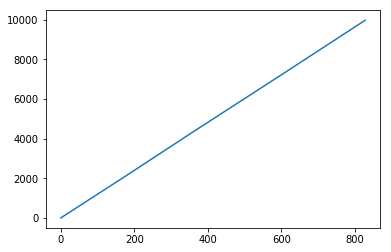

In [46]:
plt.figure()
plt.plot(t)

In [47]:
dt_array = t[1:]-t[0:-1]

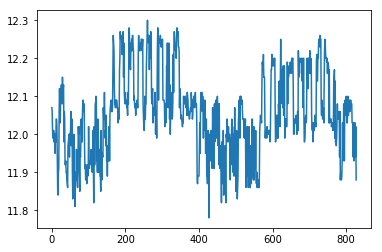

In [48]:
plt.figure()
plt.plot(dt_array)

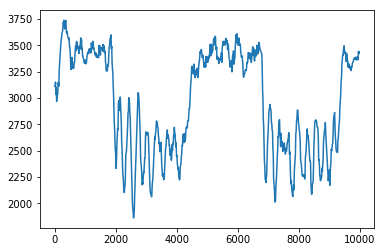

In [49]:
plt.figure()
plt.plot(t,line)

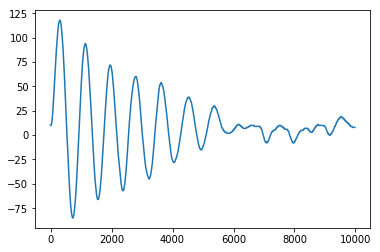

In [50]:
plt.figure()
plt.plot(t, enc)

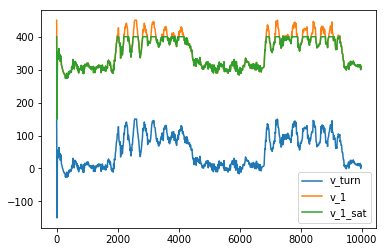

In [51]:
plt.figure()
plt.plot(t,v_sat,t,v_1,t,v_1_sat)
plt.legend(["v_turn",'v_1','v_1_sat'])

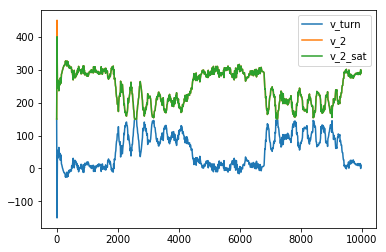

In [52]:
plt.figure()
plt.plot(t,v_sat,t,v_2,t,v_2_sat)
plt.legend(["v_turn",'v_2','v_2_sat'])

In [53]:
ser.close()

In [54]:
data_out = float_array

In [55]:
data_out.shape

(829, 10)

In [56]:
fn = "line_follow_no_vib_suppress_two_sensors.csv"

In [58]:
#np.savetxt(fn,data_out, delimiter=',')